# Replicated Module Associations

**Created**: 1 August 2022

## Environment

In [26]:
library(tidyverse)
library(survival)
library(survminer)
library(lubridate)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Load Data

In [19]:
micro.eigens <- read.csv("~/gains_team282/nikhil/expression/gene_expression/microarray.eigengenes.csv", row.names=1)

micro.eigens <- micro.eigens[, grepl("_1$", colnames(micro.eigens))]

colnames(micro.eigens) <- gsub("_1$", "", colnames(micro.eigens))

In [20]:
head(micro.eigens)

,Micro_ME_1,Micro_ME_10,Micro_ME_101,Micro_ME_102,Micro_ME_104,Micro_ME_105,Micro_ME_106,Micro_ME_11,Micro_ME_12,Micro_ME_13,⋯,Micro_ME_85,Micro_ME_86,Micro_ME_89,Micro_ME_9,Micro_ME_91,Micro_ME_92,Micro_ME_94,Micro_ME_95,Micro_ME_96,Micro_ME_99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK01310070_1,-0.01601799,-0.018423860,0.008784676,-0.0184287157,0.09118930,-0.0012578190,-0.04765499,0.02908340,0.020012019,-0.034937051,⋯,-0.028879639,-0.005930949,-0.049280964,0.02247359,-0.06592313,-0.04655985,-0.111853585,-0.045814706,-0.097747466,0.01963915
UKRV022000_5,-0.01012309,0.009753326,-0.045141181,-0.0249654503,0.01605791,0.0302653941,-0.02765091,-0.01888939,0.007295768,0.005851441,⋯,-0.025725325,-0.042799506,0.035740564,-0.02477858,0.01657866,-0.05615555,-0.063840434,0.015240068,-0.005253908,0.01153088
UK50240006_1,0.02202818,-0.073912013,-0.003008436,0.0352592993,0.13750553,-0.0550186042,-0.08103877,0.07896570,-0.049618580,-0.071130042,⋯,0.031667763,0.075830474,-0.093666920,0.07382231,-0.07706636,0.02012295,-0.007554708,0.008635123,-0.044580742,-0.05427548
UK17630075_5,-0.03301611,0.026276887,0.037108852,0.0496470003,-0.01670888,-0.0001220072,-0.04001128,-0.01689235,0.048643638,0.050307268,⋯,0.007097179,0.011394984,0.041986092,-0.03717864,0.04522091,0.05697266,-0.009536266,-0.059931797,0.001736140,0.02056358
UK47500001_1,-0.04898155,0.019620111,-0.070432857,0.0369007766,-0.00830641,-0.0146988591,-0.03082559,0.01142539,0.026574374,0.053473998,⋯,0.084174998,0.009366777,-0.001740413,-0.01603353,0.01231959,0.02731898,0.026107924,-0.080028851,0.024518041,0.03011030
UK02450065_1,-0.01580593,-0.043209227,0.014910356,-0.0006439558,0.14431479,0.0037912020,-0.07739685,0.04908136,-0.067431410,-0.049480301,⋯,-0.007514620,0.046823338,-0.004493467,0.01972235,-0.05971784,-0.01383993,-0.041274817,0.008891120,-0.031363764,0.04932842


In [54]:
rhos <- read.csv("~/gains_team282/nikhil/expression/gene_expression/microarray.eigengenes.correlations.csv", row.names=1) %>%
    dplyr::select(Rho=1)

In [55]:
head(rhos)

,Rho
,<dbl>
ME_1,0.6980062
ME_10,-0.9580793
ME_101,-0.4277884
ME_102,0.3847454
ME_104,0.5199441
ME_105,0.3556179


In [29]:
outcome <- read.table("/nfs/team282/data/gains_team282/ClinicalData/clinical_data_tsv/OUT_12jun2019.tsv", sep="\t", header=T, quote="")

outcome <- outcome %>%
    dplyr::mutate(GAinSID=stringr::str_to_upper(SubjectBarCode)) %>%
    dplyr::mutate(GAinSID=gsub("^GA", "", GAinSID))

rownames(outcome) <- outcome$GAinSID

In [30]:
head(outcome)

,CenterNumber,SubjectNumber,diagnosis,study,SubjectBarCode,DICU,alivedead,dhospdis,aldead,at6Malived,⋯,failure3,unrelated3,persist3,unrelatc3,unreldesc3,AtLeastOneCause,EDTAsent,DhospICU,Birthdate,GAinSID
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
UK01310070,UK001,2,1,ALL SUBJECT,uk01310070,1/15/08,1,4/16/08,2,2,⋯,0,0,1,0,,1,1,12/28/07,6/15/35,UK01310070
UK01150069,UK001,3,2,ALL SUBJECT,uk01150069,12/17/07,1,12/17/07,1,1,⋯,0,0,0,0,,0,1,12/14/07,9/26/26,UK01150069
UK01470071,UK001,5,1,ALL SUBJECT,UK01470071,1/30/08,1,4/20/08,1,1,⋯,0,0,0,0,,0,1,1/4/08,8/17/34,UK01470071
UK01630072,UK001,6,1,ALL SUBJECT,UK01630072,1/7/08,1,2/13/08,1,1,⋯,0,0,0,0,,0,1,1/5/08,1/20/68,UK01630072
UK01950074,UK001,8,1,ALL SUBJECT,UK01950074,1/14/08,1,4/16/08,1,1,⋯,0,0,0,0,,0,1,1/9/08,2/4/40,UK01950074
UK01140075,UK001,9,1,ALL SUBJECT,UK01140075,1/28/08,2,,NA,,⋯,0,0,0,0,,1,1,1/28/08,11/1/29,UK01140075


## Subset Patients

The same patients have contributed up to three samples to the data (D1, D3, and/or D5). I have decided to choose the last time point available for each patient.

In [47]:
sample.map <- data.frame(rownames(micro.eigens)) %>%
    dplyr::select(SampleID=1) %>%
    dplyr::mutate(GAinSID = gsub("_.$", "", SampleID), Time.Point=as.numeric(gsub(".*_", "", SampleID))) %>%
    dplyr::filter(!is.na(Time.Point)) %>%
    dplyr::filter(GAinSID %in% outcome$GAinSID) %>%
    dplyr::group_by(GAinSID) %>%
    dplyr::summarize(Last.Time.Point=max(Time.Point)) %>%
    dplyr::mutate(Sample=paste0(GAinSID, "_", Last.Time.Point))

cox.eigengenes <- micro.eigens[sample.map$Sample,]

cox.outcomes <- outcome[sample.map$GAinSID,]

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


## Cox Proportional Hazards Model

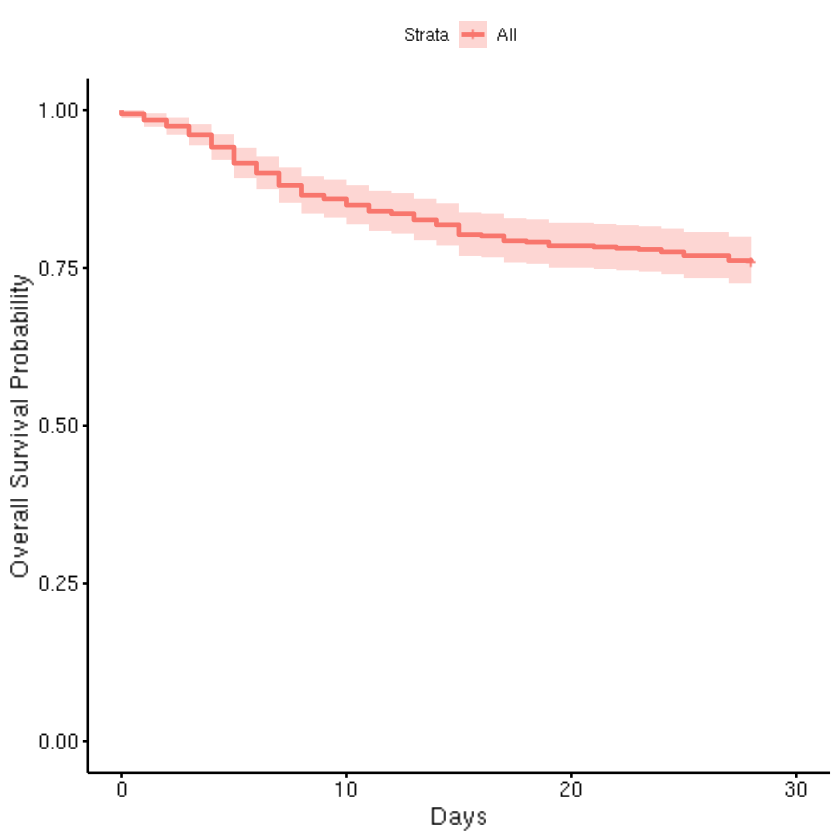

In [48]:
cox.vars <- cox.outcomes %>%
    dplyr::mutate(Date.Hospitalized=lubridate::mdy(DhospICU), Date.Death=lubridate::mdy(M6ddeath)) %>%
    dplyr::mutate(Endpoint=as.duration(Date.Hospitalized %--% Date.Death) / lubridate::ddays(1)) %>%
    dplyr::mutate(Endpoint=replace(Endpoint, Endpoint > 28, NA)) %>%
    dplyr::mutate(Status=ifelse(is.na(Endpoint), 0, 1)) %>%
    dplyr::select(Endpoint, Status) %>%
    dplyr::mutate(Endpoint=replace(Endpoint, is.na(Endpoint), 28)) %>%
    dplyr::bind_cols(cox.eigengenes)

ggsurvplot(
    fit = survfit(Surv(Endpoint, Status) ~ 1, data = cox.vars), 
    xlab = "Days", 
    ylab = "Overall Survival Probability"
)

I use a Cox proportional hazards model to test if a given module eigengene is associated with outcome. I run the model for each eigengene rather than including them all in one regression. I correct p-values using Benjamini-Hochberg FDR correction.

In [49]:
test.results <- list()

for (eigengene in colnames(cox.eigengenes)) {

    cox.result <- coxph(
        as.formula(paste0("Surv(Endpoint, Status)~", eigengene)), 
        data = cox.vars
    )

    test.results[[eigengene]] <- summary(cox.result)$coefficients
}

estimates <- do.call(rbind, test.results) %>%
    as.data.frame() %>%
    dplyr::mutate(Adjusted.P.Value=p.adjust(`Pr(>|z|)`, method="BH")) %>%
    dplyr::arrange(desc(abs(coef)), desc(desc(Adjusted.P.Value))) %>%
    dplyr::mutate(Eigengene=rownames(.), Association.Variable="Outcome", Association.Variable.Type="Outcome", Statistic.Type="Beta") %>%
    dplyr::select(Eigengene, Association.Variable, Association.Variable.Type, Statistic=coef, Statistic.Type, P.Value=`Pr(>|z|)`, Adjusted.P.Value)
head(estimates %>% dplyr::filter(Adjusted.P.Value < 0.05))

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Micro_ME_36,Micro_ME_36,Outcome,Outcome,-10.821939,Beta,1.612855e-05,0.0009141093
Micro_ME_10,Micro_ME_10,Outcome,Outcome,-10.819280,Beta,1.924441e-05,0.0009141093
Micro_ME_27,Micro_ME_27,Outcome,Outcome,-9.255983,Beta,5.944041e-05,0.0018317118
Micro_ME_22,Micro_ME_22,Outcome,Outcome,-9.196178,Beta,7.712471e-05,0.0018317118
Micro_ME_28,Micro_ME_28,Outcome,Outcome,-9.153740,Beta,7.706691e-04,0.0052295405
Micro_ME_26,Micro_ME_26,Outcome,Outcome,8.948882,Beta,1.081347e-04,0.0020545595


In [58]:
estimates %>%
    dplyr::filter(Eigengene %in% c("Micro_ME_10", "Micro_ME_36", "Micro_ME_47", "Micro_ME_52", "Micro_ME_56", "Micro_ME_78")) %>%
    dplyr::mutate(Original.ME=gsub("Micro_", "", rownames(.))) %>%
    merge(., rhos, by.x="Original.ME", by.y=0) %>%
    dplyr::mutate(Beta.Adjusted=Statistic * sign(Rho))

Original.ME,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value,Rho,Beta.Adjusted
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ME_10,Micro_ME_10,Outcome,Outcome,-10.819280,Beta,1.924441e-05,0.0009141093,-0.9580793,10.819280
ME_36,Micro_ME_36,Outcome,Outcome,-10.821939,Beta,1.612855e-05,0.0009141093,-0.8762827,10.821939
ME_47,Micro_ME_47,Outcome,Outcome,-7.826447,Beta,1.138196e-03,0.0056909794,0.7445504,-7.826447
ME_52,Micro_ME_52,Outcome,Outcome,8.748524,Beta,6.733937e-04,0.0049209541,-0.9379344,-8.748524
ME_56,Micro_ME_56,Outcome,Outcome,-8.152861,Beta,4.839825e-04,0.0046603952,0.9663387,-8.152861
ME_78,Micro_ME_78,Outcome,Outcome,-8.062432,Beta,5.886815e-04,0.0046603952,0.7927705,-8.062432
